In [3]:
## import libraries 

import pandas as pd
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Loading Dataset & Preprocessing from the DDR part

In [90]:

## loading the dataset from the DDR project
df_selenium = pd.read_csv("youtube_data_final.csv")

# renaming the column names
df_selenium.columns = ['video_id','category_id','category','keyword','comment_text']

## converting all data inside comment column in to string
for index, row in df_selenium.iterrows():
    df_selenium.at[index, 'comment_text'] = str(row['comment_text'])
df_selenium.head(2)

,video_id,category_id,category,keyword,comment_text
0,8kCMHA,4,Lo-fi,Lo-fi study music_EtD7,"our latest album Moment Of Harmony"" just rele..."
1,8kCMHA,4,Lo-fi,Lo-fi study music_EtD7,"To anybody who's reading this, I pray that wha..."


In [91]:
df_selenium.shape

(23526, 5)

In [6]:
## Here all the comments for a video are in seperate rows so we need to put put them 
# together to form a document of comments


In [92]:
## grouping all comments (in different rows in to one row) by video_id
grouped_comments = df_selenium.groupby('video_id')['comment_text'].apply(lambda x: ' '.join(x)).reset_index(name='concatenated_comments')
df_selenium = df_selenium.drop(columns='comment_text').drop_duplicates()
df_selenium_final = pd.merge(df_selenium,grouped_comments,on = 'video_id')
df_selenium_final['len'] = df_selenium_final['concatenated_comments'].str.split().apply(len) # len is the number of words
df_selenium_final.head(10)

,video_id,category_id,category,keyword,concatenated_comments,len
0,8kCMHA,4,Lo-fi,Lo-fi study music_EtD7,"our latest album Moment Of Harmony"" just rele...",1450
1,syg1xTNT9b0,1,Sports,tennis top moments,Swiatek stopped doing that after that match ag...,1195
2,LQXLEW8dMoc,1,Sports,Football compilations,"12:20 I barely touched him ref"""" 5:19 when the...",628
3,Vw7hIfI-GC0,3,Movie,Action movie trailers,Deadpool & Wolverine — New Trailer ️️ “Villain...,649
4,ioTU0GY3z-c,3,Movie,21st century best movies,What’s your favorite movie of the past 21 year...,1023
5,aDyQxtg0V2w,3,Movie,Action movie trailers,I'm going to see this just to find out how Tex...,912
6,GjLYsSDiXFs,3,Movie,The Ultimate 2024 Oscar Trailers,Looking forward to a white black panther next ...,105
7,ObnVqcD1qC0,3,Movie,Marvel movie trailers,Here's my new Henry Cavill Marvel video. Let m...,1279
8,4Ryf7gIWdtc,1,Sports,Football compilations,Futbol es eterno Love the edits. Fantastic Fo...,281
9,g0LPYf61l1A,1,Sports,Football compilations,Ahhh mapped now is the best of all time 6:25 g...,209


In [93]:
df_selenium_final.shape

## 510 rows of videos

(510, 6)

In [94]:
df_selenium_final.len.sum()

# 450k tokens to be trained on.

457837

### EDA and Analysis of the data

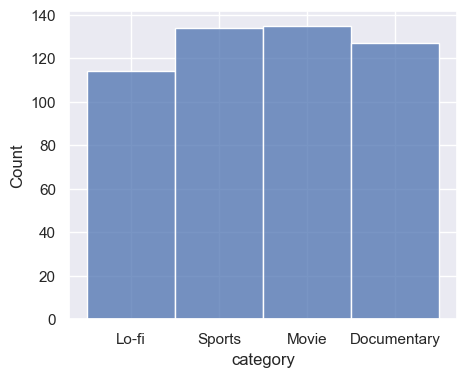

In [95]:
## histogram to see the count of each category
sns.set_style("darkgrid")
plt.figure(figsize=(5,4))
sns.histplot(df_selenium_final, x='category')

plt.show()

In [ ]:
Print("We have an even number of videos from each genre")

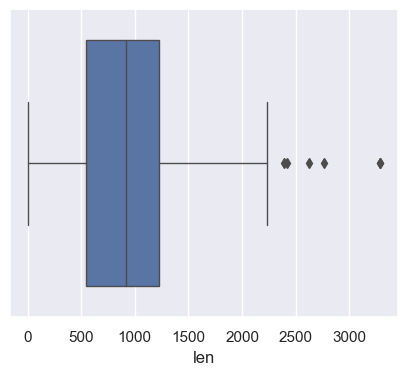

In [97]:
## checking for the distribution of length of comment corpus
plt.figure(figsize=(5,4))
sns.boxplot(x=df_selenium_final['len'], linewidth=1)
plt.show()

In [98]:
# removing those videos with less then 100 words of comment corpus
df_selenium_final = df_selenium_final[(df_selenium_final['len'] > 100)]

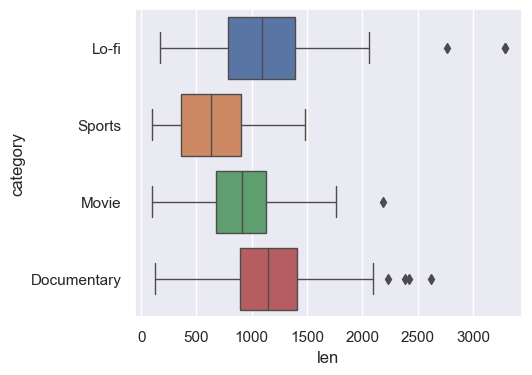

In [99]:
## checking for the distribution of length of comment corpus for each of the category

plt.figure(figsize=(5,4))
sns.boxplot(x=df_selenium_final['len'], y=df_selenium_final['category'], linewidth=1)
plt.show()

In [100]:
df_selenium_final.drop(columns='len',inplace=True)
df_selenium_final.shape

(483, 5)

In [112]:
### generate_wordclouds function

def generate_wordclouds(dataframe):
    # Get unique categories
    categories = dataframe['category'].unique()
    
    for category in categories:
        # Filter comments by category
        comments = dataframe[dataframe['category'] == category]['concatenated_comments']
        combined_comments = ' '.join(comments)
        
        # Generate a word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='black').generate(combined_comments)
        
        # Display the word cloud
        plt.figure(figsize=(6, 4))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for {category} Category', fontsize=10)
        plt.axis('off')
        plt.show()

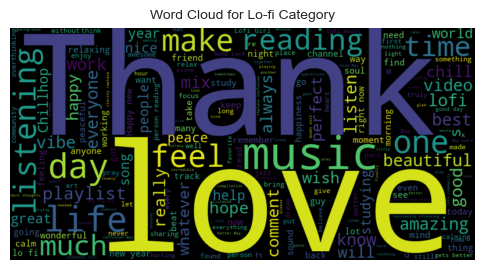

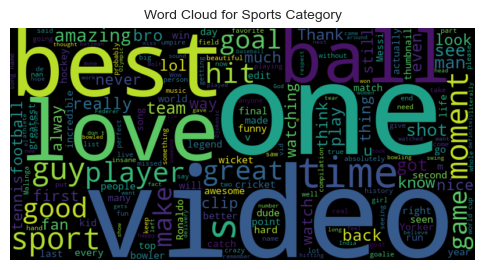

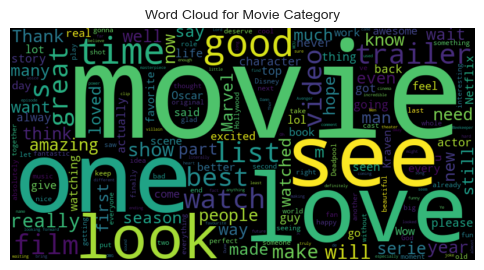

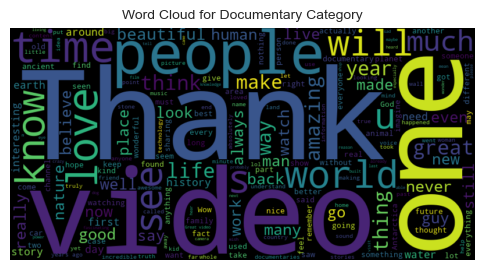

In [113]:
# Generate word clouds for each category
generate_wordclouds(df_selenium_final)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kumarkishalaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


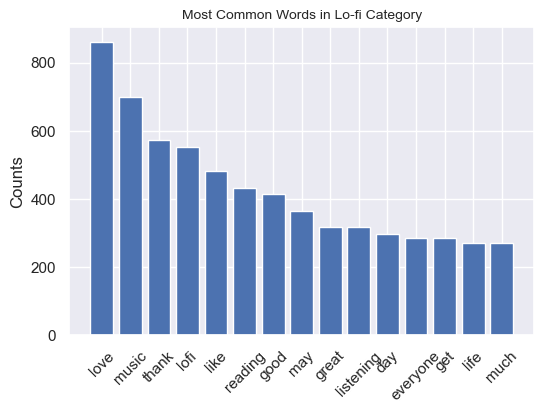

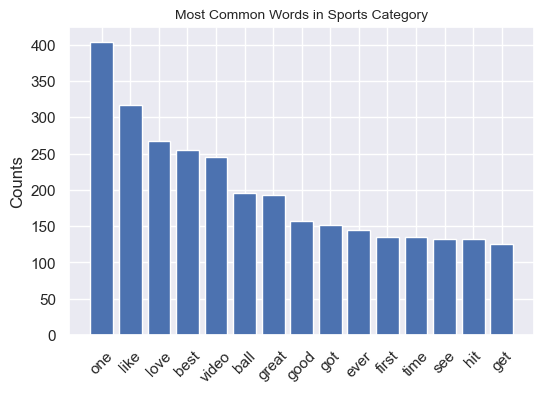

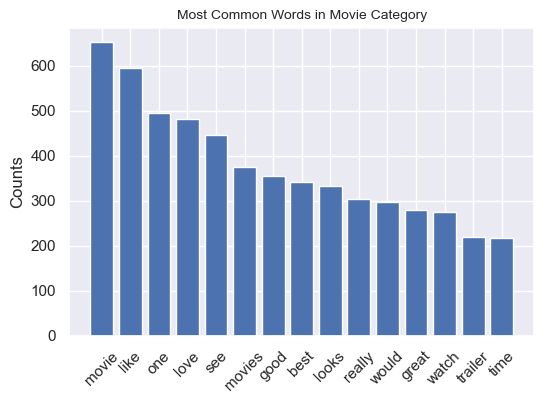

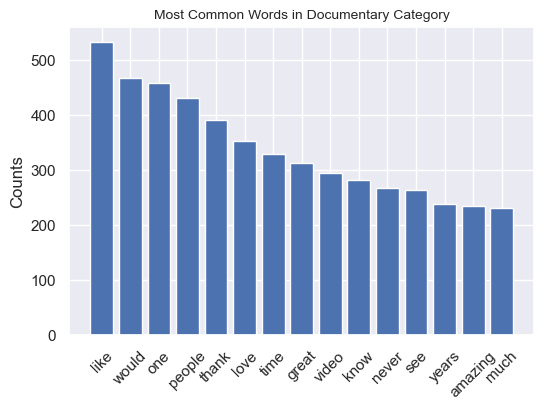

In [114]:
from nltk.corpus import stopwords
import nltk
from collections import Counter

# Ensure you have the necessary NLTK data
nltk.download('stopwords')
# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Function to count words in each category
def count_words_in_categories(dataframe):
    # Split the DataFrame by category
    categories = dataframe['category'].unique()
    
    for category in categories:
        # Filter the DataFrame by category
        subset = dataframe[dataframe['category'] == category]
        
        # Combine all comments into one large string and split into words
        words = " ".join(subset['concatenated_comments']).lower().split()
        
        # Remove stopwords and non-alphabetic tokens
        cleaned_words = [word for word in words if word.isalpha() and word not in stop_words]
        
        # Count the occurrences of each word
        word_counts = Counter(cleaned_words)
        
        # Convert the counter object to a list of (word, count) tuples
        word_counts = word_counts.most_common(15)  # Get the top 10 words
        
        # Plotting
        plt.figure(figsize=(6, 4))
        words, counts = zip(*word_counts)  # Unpack the words and counts
        plt.bar(words, counts)
        plt.title(f'Most Common Words in {category} Category', fontsize=10)
        plt.ylabel('Counts', fontsize=12)
        plt.xticks(rotation=45)  # Rotate the words on x-axis for better readability
        plt.show()

# Call the function with your dataframe
count_words_in_categories(df_selenium_final)

In [134]:
df_selenium_final.head()

,video_id,category_id,category,keyword,concatenated_comments
0,8kCMHA,4,Lo-fi,Lo-fi study music_EtD7,"our latest album Moment Of Harmony"" just rele..."
1,syg1xTNT9b0,1,Sports,tennis top moments,Swiatek stopped doing that after that match ag...
2,LQXLEW8dMoc,1,Sports,Football compilations,"12:20 I barely touched him ref"""" 5:19 when the..."
3,Vw7hIfI-GC0,3,Movie,Action movie trailers,Deadpool & Wolverine — New Trailer ️️ “Villain...
4,ioTU0GY3z-c,3,Movie,21st century best movies,What’s your favorite movie of the past 21 year...


In [135]:
df_final = df_selenium_final.copy()

## Text preprocessing

#### import libraries

In [118]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import pandas as pd
import re
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kumarkishalaya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kumarkishalaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kumarkishalaya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kumarkishalaya/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#### Function to clean and preprocess text

In [136]:

def preprocess_text(text):
    # Lowercasing
    text = text.lower()

   
    
    import re
    
    # Remove smileys and special characters using regular expression
    text = re.sub(r'[:;=x][\-o\*]?[\)\(\[\]dpo/\:\}\{@\|\\]', '', text)
    # Remove special characters and numbers, retain only letters and spaces
    text = re.sub(r'[^a-z\s]', '', text)  
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Stop words removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]
    
    # Rejoin tokens into a string
    return ' '.join(lemmatized_tokens)

In [137]:
df_final.head()

,video_id,category_id,category,keyword,concatenated_comments
0,8kCMHA,4,Lo-fi,Lo-fi study music_EtD7,"our latest album Moment Of Harmony"" just rele..."
1,syg1xTNT9b0,1,Sports,tennis top moments,Swiatek stopped doing that after that match ag...
2,LQXLEW8dMoc,1,Sports,Football compilations,"12:20 I barely touched him ref"""" 5:19 when the..."
3,Vw7hIfI-GC0,3,Movie,Action movie trailers,Deadpool & Wolverine — New Trailer ️️ “Villain...
4,ioTU0GY3z-c,3,Movie,21st century best movies,What’s your favorite movie of the past 21 year...


#### preprocess the text column

In [138]:
df_final['processed_comments'] = df_final['concatenated_comments'].apply(preprocess_text)

In [139]:
df_final['processed_comments'][5]

'im go see find texa cali end side texa california work togethernow know fiction kind american crux movi jess plemon contemptu laugh realli remind phillip seymour hoffman damn miss admit film advanc advertis campaign movi histori better hurri get cinema news surpris didnt say come soon citi near lol three term presid ah think see problem texa make success movi promot campaign ever way ron swanson would texa saw trailer theatr start cri feel like possibl lifetim canada hey keep im tri watch curl movi budget million could make free wait littl plot twist eerienc imax spring mean irl think typo script meant say florida texa cali tx realli got think og mw mission accord kind american that scariest part entir trailer make one polit parti doesnt hate movi tobey maguir watch film hold mari jane jess plemmon almost never scream show lot emot facial eress he alway calm yet know danger psycho nice person incred actor movi good make real life adapt guy idea let nick offerman play presid deserv rai

## Building the DOC2VEC model

#### What are word embeddings?

Word embeddings are numerical representations of words that enable machines to understand and work with textual data. Unlike traditional one-hot encoding, where each word is represented as a sparse binary vector, word embeddings map words into dense, continuous-valued vectors in a multi-dimensional space.

To use word embeddings for creating vector for a document, we can average the embeddings for all the words (Average of pre-trained Word embedding).

#### What is Doc2Vec?
- Doc2Vec, short for Document-to-Vector, is a natural language processing (NLP) technique that belongs to the family of word embedding models. 
- It is an extension of the Word2Vec model, representing words in continuous vector space. Doc2Vec, however, is designed to extend this idea to entire documents or pieces of text, such as paragraphs, sentences, or in our case corpus of comments for a video, and represent them as fixed-length vectors in a continuous space.
- Doc2Vec learns vector representations of documents by combining the word vectors with a document-level vector (nothing fancy).


Le and Mikolov in 2014 introduced the Doc2Vec algorithm, which usually outperforms such simple-averaging of Word2Vec vectors. And Doc2Vec is usually trained on your own dataset rather than pretrained since documents can be very different in different contexts. 

#### Training process of Doc2Vec
- The training process is the same as Word2Vec, just that another document vector is also learned. While learning the word embedding can either be
    - randomly initialized (learned from scratch) or
    - a pre-trained weights (using Word2Vec embedding)

##### Below we are only going to use the randomly initialized weights and compare its performance to the average of word embedding method. The difference can be critical given the size of our dataset is small. 

#### import libraries

In [54]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

### Using Average of pre-trained Word embedding

In [125]:
# load glove model (pre-trained)
glove_vectors = api.load("glove-wiki-gigaword-300")

In [140]:

# Function to compute average word embeddings
def average_word_embeddings(words, model):
    # Filter out words not in model
    words = [word for word in words if word in model]
    # If no words in the model, return a zero vector
    if len(words) == 0:
        return np.zeros(model.vector_size)
    # Compute average vector
    word_vectors = np.array([model[word] for word in words])
    avg_vector = word_vectors.mean(axis=0)
    return avg_vector

# Apply the function to your concatenated_comments column
df_final['average_word2vec_embedding'] = df_final['processed_comments'].apply(lambda x: average_word_embeddings(x, glove_vectors))

# Check the result
df_final.head(2)

,video_id,category_id,category,keyword,concatenated_comments,processed_comments,average_word2vec_embedding
0,8kCMHA,4,Lo-fi,Lo-fi study music_EtD7,"our latest album Moment Of Harmony"" just rele...",latest album moment harmoni releas anybodi who...,"[-0.25685912, 0.058198206, -0.26651698, -0.073..."
1,syg1xTNT9b0,1,Sports,tennis top moments,Swiatek stopped doing that after that match ag...,swiatek stop match vekic face backlash fan pla...,"[-0.24637727, 0.036277242, -0.25711352, -0.074..."


#### PCA decomposition of average word embeddings

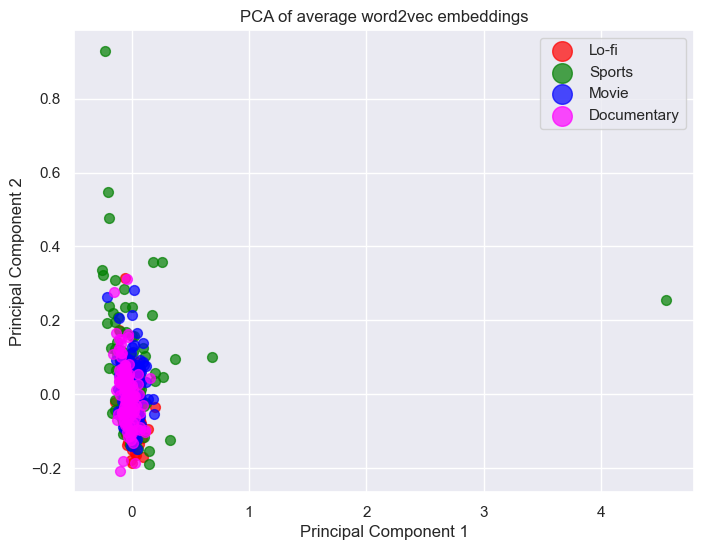

In [142]:
# Convert the 'average_word2vec_embedding' column into a format suitable for PCA
X = np.stack(df_final['average_word2vec_embedding'], axis=0)  

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Add the principal components to your dataframe
df_final['PC1'] = X_pca[:, 0]
df_final['PC2'] = X_pca[:, 1]

# Plotting
plt.figure(figsize=(8, 6))
categories = df_final['category'].unique()

primary_colors = ['red', 'green', 'blue', 'magenta','yellow', 'cyan', 'black']

# Check if there are enough colors, otherwise print a warning
if len(categories) > len(primary_colors):
    print("Warning: Not enough primary colors for the number of categories. Consider adding more colors.")


for category, color in zip(categories, primary_colors):
    indices = df_final['category'] == category
    plt.scatter(df_final.loc[indices, 'PC1'], df_final.loc[indices, 'PC2'], label=category, s=50, alpha=0.7, color=color)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of average word2vec embeddings')
plt.legend(markerscale=2)
plt.grid(True)


### Training Doc2Vec Model from scratch (no pretrained weights for words)

In [141]:
# Tokenize and tag the text in the DataFrame for training process
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(df_final['processed_comments'])]


# Set up the model
doc2vec_model = Doc2Vec(vector_size=300, min_count=2, epochs=40)

# Build the vocabulary
doc2vec_model.build_vocab(tagged_data)

# Train the model
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

#save the model so that we don't have to train it again 
#doc2vec_model.save("doc2vec_scratch/doc2Vec_model_scratch.kv")

# loading the model 
#doc2vec_model = KeyedVectors.load('doc2vec_scratch/doc2Vec_model_scratch.kv', mmap='r')

# Infer the vectors for each document
vectors = [doc2vec_model.infer_vector(word_tokenize(doc.lower())) for doc in df_final['processed_comments']]

# Add the vectors to the DataFrame
df_final['doc_2_vec_embedding'] = vectors

In [143]:
df_final.head(2)

,video_id,category_id,category,keyword,concatenated_comments,processed_comments,average_word2vec_embedding,doc_2_vec_embedding,PC1,PC2
0,8kCMHA,4,Lo-fi,Lo-fi study music_EtD7,"our latest album Moment Of Harmony"" just rele...",latest album moment harmoni releas anybodi who...,"[-0.25685912, 0.058198206, -0.26651698, -0.073...","[0.5049749, -1.0058025, -0.56973124, 0.2508382...",-0.053509,-0.085263
1,syg1xTNT9b0,1,Sports,tennis top moments,Swiatek stopped doing that after that match ag...,swiatek stop match vekic face backlash fan pla...,"[-0.24637727, 0.036277242, -0.25711352, -0.074...","[1.4480369, 1.4342133, 1.7340375, 1.5165997, 0...",-0.044136,0.084438


### PCA decomposition of doc_2_vec_embedding learnt from the data

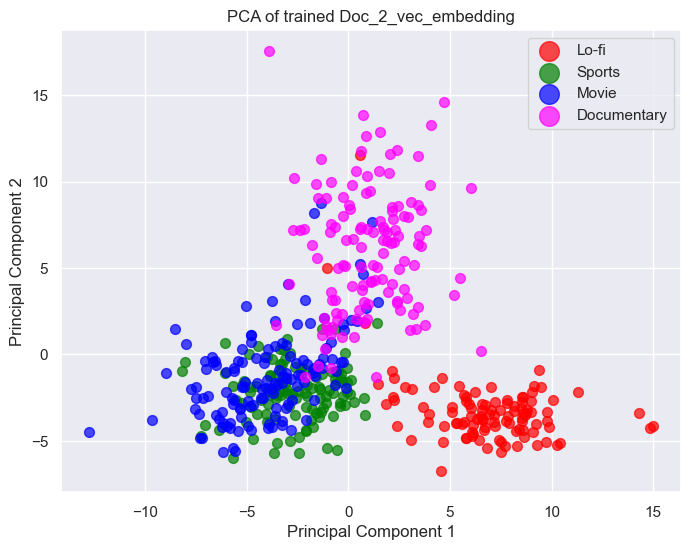

In [147]:
# Convert the 'doc_2_vec_embedding' column into a format suitable for PCA
X = np.stack(df_final['doc_2_vec_embedding'], axis=0)  

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Add the principal components to your dataframe
df_final['PC1'] = X_pca[:, 0]
df_final['PC2'] = X_pca[:, 1]

# Plotting
plt.figure(figsize=(8, 6))
categories = df_final['category'].unique()

primary_colors = ['red', 'green', 'blue', 'magenta','yellow', 'cyan', 'black']

# Check if there are enough colors, otherwise print a warning
if len(categories) > len(primary_colors):
    print("Warning: Not enough primary colors for the number of categories. Consider adding more colors.")


for category, color in zip(categories, primary_colors):
    indices = df_final['category'] == category
    plt.scatter(df_final.loc[indices, 'PC1'], df_final.loc[indices, 'PC2'], label=category, s=50, alpha=0.7, color=color)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of trained Doc_2_vec_embedding')
plt.legend(markerscale=2)
plt.grid(True)


### PCA decomposition of doc_vector_pretrained (with pre-trained word2vec weights)) 

### Pre processing the data for Supervised Classification

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [148]:

# Convert the list in 'vector_column' into separate columns
# This assumes all vectors are of the same length
vector_df = pd.DataFrame(df_final['doc_2_vec_embedding'].tolist(), index=df_final.index)
vector_df.columns = [f'feature_{i}' for i in range(vector_df.shape[1])]  # Naming the new columns

df_final_features = pd.concat([df_final[['category']],vector_df],axis=1)
df_final_features.head(10)

,category,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299
0,Lo-fi,0.504975,-1.005803,-0.569731,0.250838,0.736125,0.959596,-0.884501,-0.168430,-0.695364,...,0.879706,-0.424607,-1.050109,0.109376,1.948854,-0.061048,2.062277,0.709491,0.710977,-0.432369
1,Sports,1.448037,1.434213,1.734038,1.516600,0.298025,-1.027059,2.161475,1.072151,-1.448209,...,-3.576134,1.811655,1.917337,-1.648083,0.147680,-0.929233,-0.466954,0.810370,-1.209958,1.379686
2,Sports,0.961624,-0.555981,0.127203,0.023505,-0.281346,-0.427636,0.005875,0.310738,-0.943553,...,-0.139905,0.444363,-0.406977,-0.523252,-0.576566,0.706316,0.028176,-0.688869,-0.692681,-0.601564
3,Movie,1.377271,0.043476,-0.336512,-1.101950,0.207015,-1.819303,-0.235635,1.872384,-0.882262,...,-0.640964,1.068272,-1.052027,0.065539,0.897440,-0.204647,0.435414,-0.466046,2.001609,-1.275622
4,Movie,0.921891,0.064877,0.085587,1.382134,-0.541983,-2.339587,-1.024171,1.453450,0.825714,...,0.201973,1.710036,-0.155509,-0.337352,1.755791,2.403020,0.624185,0.196904,3.656034,-1.801541
5,Movie,-0.276237,0.016820,0.484628,-1.868196,-0.407031,-1.080107,-0.511828,-0.198138,0.943869,...,-0.770848,0.331209,0.892966,2.537313,1.673933,3.975983,0.311818,-0.596342,2.263630,0.031600
6,Movie,-0.102822,0.448902,0.333670,-0.028341,0.194387,-0.765084,-0.149163,-0.066496,-0.626373,...,0.017655,0.928311,-0.610501,0.615644,0.919071,0.679013,0.265952,-0.028887,0.427731,0.534544
7,Movie,0.765055,0.491912,2.851085,-0.791974,-1.615017,-0.897353,1.383152,-2.504767,0.155026,...,0.355647,2.029844,0.686045,-0.585176,4.027064,3.873973,1.297433,-0.683832,2.644944,0.035975
8,Sports,-0.375406,-1.166052,-0.502018,-0.256525,-0.592612,-0.822133,-0.697862,-0.066354,0.061877,...,0.255254,0.159582,0.339350,0.332634,0.006969,0.255624,0.551844,0.265266,0.407462,-0.836539
9,Sports,-0.176211,0.006471,-0.295913,0.244158,-0.211763,-1.023557,-0.859584,0.774575,-0.352450,...,0.120825,0.533515,-0.786553,0.208335,-0.793953,-0.024449,0.525024,0.504667,-0.471904,0.321895


### Important Note (potential overfitting)

The major problem here is we have 483 rows of data and 300 features. So we run of risk of overfitting. So we will apply PCA again on this and use a scree-plot to select the top components which have the most variance to explain the category. 

### PCA And Scree-plot analysis

In [150]:
## PCA 
# Separate out the features and the category
features = df_final_features.drop('category', axis=1)
category = df_final_features['category']

# Standardizing the features (important for PCA)
features = StandardScaler().fit_transform(features)

# Perform PCA
pca = PCA()
principalComponents = pca.fit_transform(features)

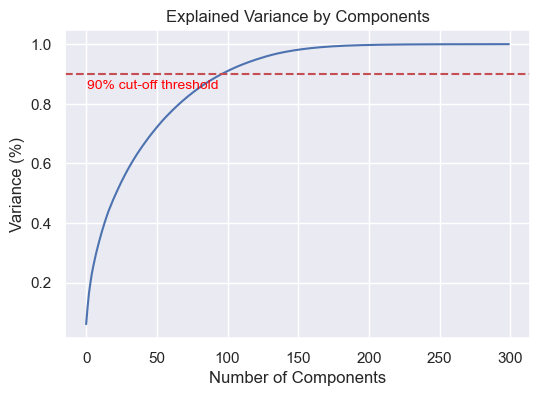

In [169]:
## Scree-plot

plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Variance (%)', fontsize=12)  # for each component
plt.title('Explained Variance by Components', fontsize=12)

# Draw line at 90% of explained variance 
plt.axhline(y=0.90, color='r', linestyle='--')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=10)

plt.grid(True)
plt.show()

#### Observation 
 here we can see that top ~100 components cover about 90% of the variance so we will take only the top 100 components
    

In [156]:
# Create a DataFrame from the first 100 components
principalComponents_df = pd.DataFrame(principalComponents[:, :100], 
                                      columns=[f'PC{i+1}' for i in range(100)])

### Running a Logistic regression

In [171]:
# Assuming 'category' is the column you want to predict
X = principalComponents_df  # top 100 Features based on PCA
y = df_final_features['category']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a logistic regression model
# For multiclass problems, 'multinomial' and 'lbfgs' solver are often used settings
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
log_reg.fit(X_train, y_train)

# Make predictions on the test set
predictions = log_reg.predict(X_test)

### Evaluation

In [172]:

# Evaluate the model
print("Classification Report of Logistic Regression:")
print(classification_report(y_test, predictions))


Classification Report of Logistic Regression:
              precision    recall  f1-score   support

 Documentary       0.88      0.78      0.83        37
       Lo-fi       0.97      1.00      0.98        29
       Movie       0.87      0.89      0.88        44
      Sports       0.89      0.94      0.92        35

    accuracy                           0.90       145
   macro avg       0.90      0.90      0.90       145
weighted avg       0.90      0.90      0.90       145



## Decision Tree & RF

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [161]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)



Decision Tree Classifier Report
              precision    recall  f1-score   support

 Documentary       0.93      0.73      0.82        37
       Lo-fi       1.00      0.97      0.98        29
       Movie       0.79      0.95      0.87        44
      Sports       0.86      0.86      0.86        35

    accuracy                           0.88       145
   macro avg       0.90      0.88      0.88       145
weighted avg       0.88      0.88      0.87       145

Decision Tree Confusion Matrix


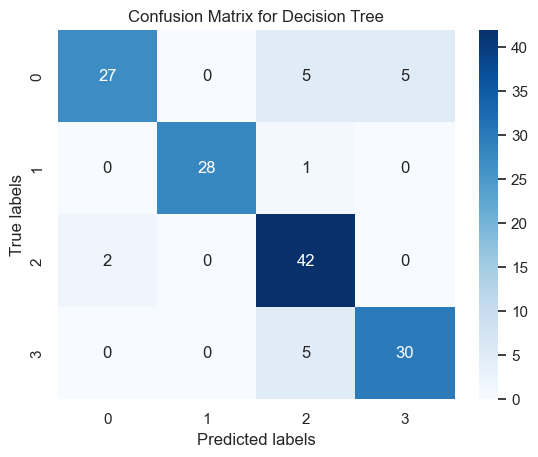

Random Forest Classifier Report
              precision    recall  f1-score   support

 Documentary       0.89      0.86      0.88        37
       Lo-fi       1.00      1.00      1.00        29
       Movie       0.98      0.91      0.94        44
      Sports       0.87      0.97      0.92        35

    accuracy                           0.93       145
   macro avg       0.93      0.94      0.93       145
weighted avg       0.93      0.93      0.93       145

Random Forest Confusion Matrix


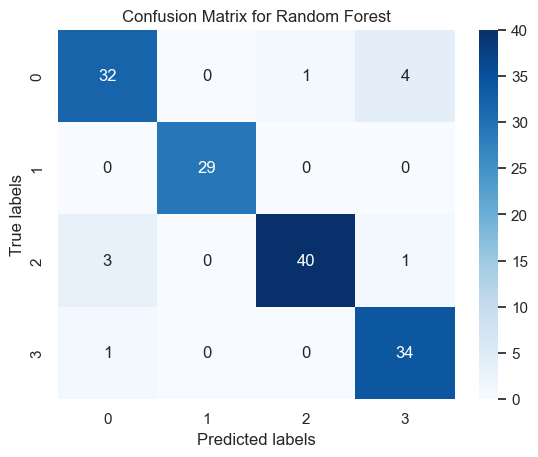

In [162]:
# Classification Report and Confusion Matrix for Decision Tree
print("Decision Tree Classifier Report")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix")
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_mat_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Classification Report and Confusion Matrix for Random Forest
print("Random Forest Classifier Report")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix")
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()